In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('pinguinos.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
df = df.dropna(subset=['body_mass_g'], axis= 'index')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


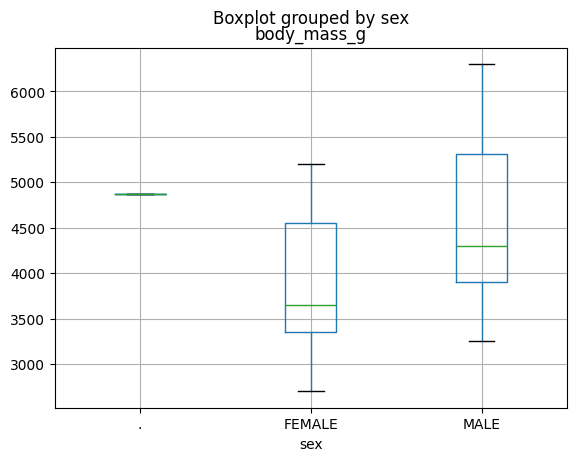

In [7]:
df.boxplot(column='body_mass_g', by='sex')

plt.show()

In [8]:
df = df[df['sex'] != '.']
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


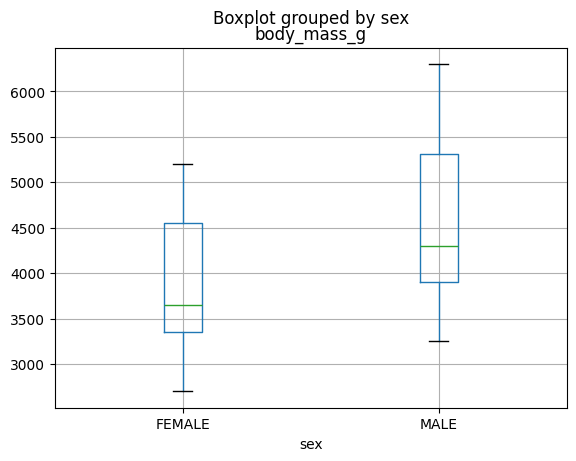

In [9]:
df.boxplot(column='body_mass_g', by='sex')

plt.show()

In [10]:
max_body_mass = df['body_mass_g'].max()
count_max_body_mass = df[df['body_mass_g'] == max_body_mass].shape[0]

print(f"The maximum value of 'body_mass_g' is: {max_body_mass}")
print(f"This value appears {count_max_body_mass} times.")

The maximum value of 'body_mass_g' is: 6300.0
This value appears 1 times.


In [11]:
top_10_body_mass = df['body_mass_g'].nlargest(10).unique()

print("Top 10 maximum values in 'body_mass_g' and their counts:")
for value in top_10_body_mass:
    count = df[df['body_mass_g'] == value].shape[0]
    print(f"Value: {value}, Count: {count}")

Top 10 maximum values in 'body_mass_g' and their counts:
Value: 6300.0, Count: 1
Value: 6050.0, Count: 1
Value: 6000.0, Count: 2
Value: 5950.0, Count: 2
Value: 5850.0, Count: 3
Value: 5800.0, Count: 2


In [12]:
q3_body_mass = df['body_mass_g'].quantile(0.75)
print(f"El valor del tercer cuartil (Q3) para 'body_mass_g' es: {q3_body_mass}")

El valor del tercer cuartil (Q3) para 'body_mass_g' es: 4750.0


In [13]:
q1_body_mass = df['body_mass_g'].quantile(0.25)
q3_body_mass = df['body_mass_g'].quantile(0.75)
iqr_body_mass = q3_body_mass - q1_body_mass
upper_limit_outliers = q3_body_mass + 1.5 * iqr_body_mass

print(f"El primer cuartil (Q1) para 'body_mass_g' es: {q1_body_mass}")
print(f"El tercer cuartil (Q3) para 'body_mass_g' es: {q3_body_mass}")
print(f"El rango intercuartílico (IQR) para 'body_mass_g' es: {iqr_body_mass}")
print(f"El límite superior para los outliers es (Q3 + 1.5 * IQR): {upper_limit_outliers}")

El primer cuartil (Q1) para 'body_mass_g' es: 3550.0
El tercer cuartil (Q3) para 'body_mass_g' es: 4750.0
El rango intercuartílico (IQR) para 'body_mass_g' es: 1200.0
El límite superior para los outliers es (Q3 + 1.5 * IQR): 6550.0
